In [1]:
import os
import torch
import pandas as pd
import numpy as np
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split

In [3]:
FILE_PATH = "IndianFinancialNews_with_sentiment.csv"
df = pd.read_csv(FILE_PATH)

In [5]:
# Map sentiment labels
label_mapping = {"positive": 1, "negative": 0, "neutral": 2}
df["Sentiment_Label"] = df["Sentiment"].map(label_mapping)

In [35]:

tokenizer = DistilBertTokenizer.from_pretrained("models--distilbert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

OSError: Incorrect path_or_model_id: 'models--distilbert-base-uncased'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [37]:
# Convert to Hugging Face dataset
train_texts, test_texts, train_labels, test_labels = train_test_split(df["Text"], df["Sentiment_Label"], test_size=0.2, random_state=42)
train_data = Dataset.from_dict({"text": train_texts, "label": train_labels})
test_data = Dataset.from_dict({"text": test_texts, "label": test_labels})

train_data = train_data.map(tokenize_function, batched=True)
test_data = test_data.map(tokenize_function, batched=True)

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [27]:
# ------------------------- #
# 🔹 Load Pretrained BERT Model
# ------------------------- #
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
import torch
device = torch.device("cpu")
model.to(device)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [13]:
# ------------------------- #
# 🔹 Train the Model
# ------------------------- #
training_args = TrainingArguments(
    output_dir="./bert_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
)

trainer.train()


/opt/anaconda3/lib/python3.12/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,1.098135
2,No log,1.109401
3,No log,1.115548


TrainOutput(global_step=3, training_loss=1.074735403060913, metrics={'train_runtime': 10.1627, 'train_samples_per_second': 0.59, 'train_steps_per_second': 0.295, 'total_flos': 198704641536.0, 'train_loss': 1.074735403060913, 'epoch': 3.0})

In [39]:
# ------------------------- #
# 🔹 Save the Model
# ------------------------- #
model.save_pretrained("./bert_sentiment_model")
tokenizer.save_pretrained("./bert_sentiment_model")

print("✅ BERT model training complete! Model saved in 'bert_sentiment_model'")
model.save_pretrained("./bert_sentiment_model")
tokenizer.save_pretrained("./bert_sentiment_model")

print("✅ BERT model training complete! Model saved in 'bert_sentiment_model'")

✅ BERT model training complete! Model saved in 'bert_sentiment_model'
✅ BERT model training complete! Model saved in 'bert_sentiment_model'


**How to Run the Script and check the saved model**

In [14]:
pip install torch transformers datasets pandas numpy scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [16]:
!python train_bert.py

python3: can't open file '/content/train_bert.py': [Errno 2] No such file or directory


**Evaluate BERT Model**

In [17]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
# ------------------------- #
# 🔹 Load Model & Tokenizer
# ------------------------- #
MODEL_PATH = "./bert_sentiment_model"
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_PATH)
model = DistilBertForSequenceClassification.from_pretrained(MODEL_PATH)

In [43]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [45]:
# ------------------------- #
# 🔹 Load Test Data
# ------------------------- #
df = pd.read_csv("IndianFinancialNews_with_sentiment.csv")

In [47]:
# Map sentiment labels
label_mapping = {"positive": 1, "negative": 0, "neutral": 2}
df["Sentiment_Label"] = df["Sentiment"].map(label_mapping)

test_texts = df["Text"].tolist()
test_labels = df["Sentiment_Label"].tolist()

In [49]:
# ------------------------- #
# 🔹 Tokenize & Predict
# ------------------------- #
def predict(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    return torch.argmax(outputs.logits, axis=1).cpu().numpy()

y_pred = []
for i in range(0, len(test_texts), 16):  # Batch processing
    batch_texts = test_texts[i:i+16]
    batch_preds = predict(batch_texts)
    y_pred.extend(batch_preds)

In [51]:
# ------------------------- #
# 🔹 Evaluate Model
# ------------------------- #
print("BERT Model Classification Report:")
print(classification_report(test_labels, y_pred, target_names=["Negative", "Positive", "Neutral"]))

BERT Model Classification Report:


NameError: name 'classification_report' is not defined

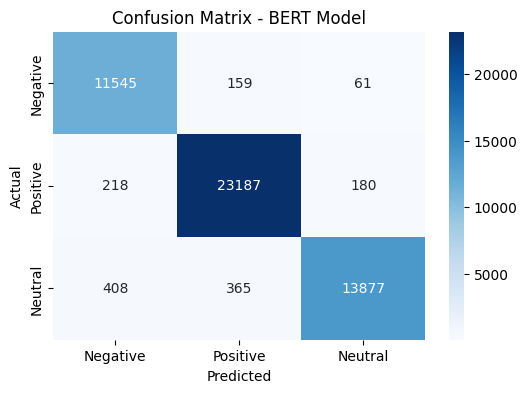

In [24]:
# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)

# ------------------------- #
# 🔹 Plot Confusion Matrix
# ------------------------- #
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive", "Neutral"], yticklabels=["Negative", "Positive", "Neutral"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - BERT Model")
plt.show()